# **Autofunciones de onda $$\psi_n(x)=\frac{1}{\sqrt{2^nn!\sqrt{\pi}}}e^{-x^2/2}\text{H}_n(x),$$ asociadas al oscilador, donde los polinomios de Hermite $H_n(x)$ vienen dados por $$\text{H}_n(x)=\sum_{k=0}^N \frac{(-1)^k}{(n-2k)!k!}(2x)^{n-2k},$$**
# **con $N=n/2\text{ y }N={(n-1)/2}$ para $n$ par e impar, respectivamente. Estos polinomios, están contenidos en la librería _scipy.special_.**



findfont: Font family ['Latin Modern Roman'] not found. Falling back to DejaVu Sans.


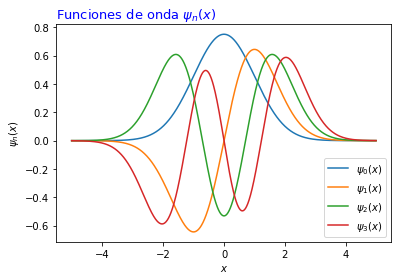

In [ ]:
#Librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial

#Definición de autofunciones de onda con la librería scipy.special
def WaveFuction(n , x):
    Hermite = hermite(n)
    return pow( pow(np.pi,0.5) * pow(2,n) * factorial(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Dominio de valores de x
x = np.arange(-5, 5 , 0.01)

#Generador de gráficas de autofunciones
for n in range(4):
    plt.plot(x, WaveFuction(n, x))

#Parte visual: Etiquetas, títulos, estilos de fuente, etc
font1 = {'family':'Latin Modern Roman','color':'blue','size':13}
plt.xlabel('$x$')
plt.ylabel('$\psi_n(x)$')
plt.title('Funciones de onda $\psi_n(x)$', fontdict = font1, loc = 'left')
plt.legend(["$\psi_0(x)$", "$\psi_1(x)$", "$\psi_2(x)$", "$\psi_3(x)$"], loc ="lower right")



---


# **Densidades de probabilidad $\pi(x) = |\psi_n(x)|^2$ de los autoestados del oscilador con autovalores de energía $$E_n = n + \frac{1}{2},$$ y potencial armónico dado por $$V(x) = \frac{x^2}{2}.$$**



Text(0.0, 1.0, 'Potencial escalar / Densidad de probabilidad $|\\psi_n(x)|^2$')

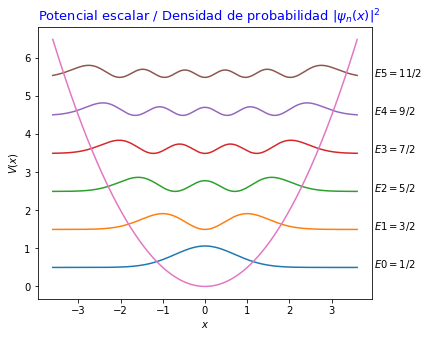

In [ ]:
#Librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct

#Definición de autofunciones de onda con la librería scipy.special
def ψ(n,x):
    Hermite = hermite(n)
    return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
    return n + 0.5

#Rango de valores de x
x = np.arange(-pow(2*Energy(6), 0.5) , pow(2*Energy(6) , 0.5) , 0.01)

#Dimensiones de gráfico
fig, ax = plt.subplots(figsize=(6,5))

#Generador de gráficas de densidades de probabilidad
for n in range(6):
    DensityProb = Energy(n) + pow(ψ(n,x) , 2)
    plt.text(4, Energy(n), f"$E{n}={2*n+1}/2$")
    plt.plot(x, DensityProb)

#Graficación del potencial armónico
plt.plot(x, 0.5 * pow(x , 2))

#Parte visual: Etiquetas, títulos, estilos de fuente, etc
font1 = {'family':'Latin Modern Roman','color':'blue','size':13}
font2 = {'family':'Latin Modern Roman','color':'darkred','size':15}
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.title('Potencial escalar / Densidad de probabilidad $|\psi_n(x)|^2$', fontdict = font1, loc = 'left')



---


# **Partícula en un potencial armónico a $T\rightarrow0$ (muestreo de posiciones $x$ del oscilador)**

findfont: Font family ['Latin Modern Roman'] not found. Falling back to DejaVu Sans.


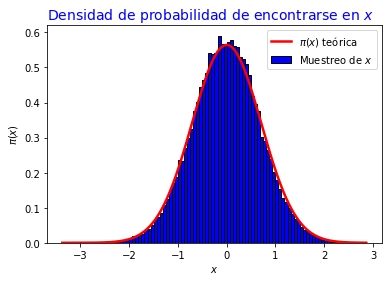

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

#x inicial
x = 0

#Valores de x recopilados
grid_x = []

#Cambios aleatorios de la posición del oscilador
for i in range(100000):
    x_new = x + random.uniform(-1,1)
    #Probabilidad de aceptación de Metrópolis
    if random.uniform(0,1) < np.exp(pow(x,2) - pow(x_new,2)):
        #Redefinir x
        x = x_new
        #Recopilar los valores de x obtenidos
        grid_x.append(x)
        

#Densidad de probabilidad teórica
X = np.arange(min(grid_x) , max(grid_x), 0.01)
QuantumDensity = pow(np.pi,-0.50) * np.exp(-pow(X, 2))
plt.plot(X , QuantumDensity, linewidth = 2.5, color = 'red')

#Histograma
plt.hist(grid_x , bins = 100 , density = True, color = 'blue', edgecolor = 'black', facecolor='blue')

#Estilo de histograma
font1 = {'family':'Latin Modern Roman','color':'blue','size':14}
plt.title("Densidad de probabilidad de encontrarse en $x$", fontdict = font1, loc = 'left')
plt.xlabel("$x$")
plt.ylabel("$\pi(x)$")
plt.legend(["$\pi(x)$ teórica", "Muestreo de $x$"], loc ="upper right")



---


# **Muestreo de posiciones del oscilador armónico a temperatura finita $T = 1/\beta$, con densidad de probabilidad $$\pi(n,x) = \underbrace{e^{-\beta E_n}}_{\pi(n)}\times\underbrace{|\psi_n(x)|^2}_{\pi(x)},$$ y probabilidades de tránsito entre posiciones $x\rightarrow x'$ y autoestados $n \rightarrow m$, dadas respectivamente por el criterio de aceptación de metrópolis, $$ p(x\rightarrow x') = \min\left( 1 , \frac{\pi(x')}{\pi(x)}\right), $$ $$ p(n\rightarrow m) = \min\left( 1 , \frac{\pi(m)}{\pi(n)}\right). $$**





---


# **En primer lugar, sea $\beta = 0.2$**



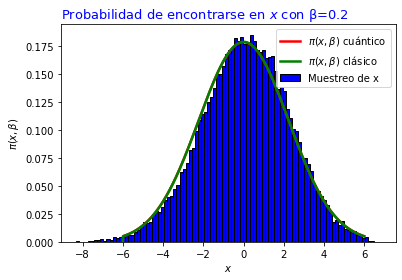

In [ ]:
#Librerías necesarias
import random, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct
from functools import lru_cache

#Guarda los resultados de ψ(n-2) y ψ(n-1) para calcular rápidamente ψ(n) de manera recursiva
@lru_cache(maxsize=None)

#Autofunciones de onda
def ψ(n,x):
  Hermite = hermite(n)
  return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
  return n + 0.5

#Recíproco de la temperatura
β = 0.2

#Condiciones iniciales para posiciones, niveles de energía
x = 0 #Posición inicial (posición de equilibrio)
x_new = 0 #Valor final del tránsito de posición
n = 0 #Nivel de energía inicial.
m = 0 #Nivel de energía final

#Tupla para recopilar valores de x en el muestreo
grid_x = []

#Generador de tránsitos de posición y niveles de energía
for k in range(100000):
  #Muestreo de x
  x_new = x + random.uniform(-1,1)
    #Probabilidad de aceptación de Metrópolis para x
  if random.uniform(0,1) < pow(ψ(n,x_new)/ψ(n,x) , 2):
      #Redefinición de posición del oscilador
      x = x_new
  #Muestreo de n
  m = n + random.choice([-1,1])
    #Exclución de niveles de energía negativos
  if m>=0:
      #Probabilidad de aceptación de Metrópolis para n
    if random.uniform(0,1) < np.exp(-β*(Energy(m)-Energy(n))) * pow(ψ(m,x)/ψ(n,x) , 2):
        #Redefinición del nivel de energía del oscilador
      n = m
  #Recopilar los valores de x obtenidos en el muestreo
  grid_x.append(x)

#Definición de fuentes y estilo de letra
font1 = {'family':'Latin Modern Roman','color':'blue','size':13}
font2 = {'family':'Latin Modern Roman','color':'darkred','size':15}

#Graficación del histograma
plt.ion()
n,bins,patches=plt.hist(grid_x, bins=100, density=True,facecolor='blue', edgecolor = 'black')
plt.xlabel('$x$')
plt.ylabel('$\pi(x,β)$')
plt.title(f"Probabilidad de encontrarse en $x$ con β={β}", fontdict = font1, loc = 'left')


#------------Curvas de densidad de probabilidad teóricas---------------#

#Densidad de probabilidad cuántica teórica
def QuantumDensity(x,β):
  return pow(np.tanh(0.5*β)/np.pi , 0.5) * np.exp(-pow(x,2) * np.tanh(0.5*β))

#Densidad de probabilidad clásica teórica
def ClassicDensity(x,β):
  return pow(0.5*β/np.pi , 0.5) * np.exp(- 0.5*β*pow(x,2))

#Rango de valores del eje de las abscisas
X = np.arange(-6 , 6 , 0.01)


#Rango de valores del eje de las ordenadas
QuantumDensity_Y = np.array([QuantumDensity(-10,β)])
ClassicDensity_Y = np.array([ClassicDensity(-10,β)])

#Graficación
for k in range(1,len(X)):
  QuantumDensity_Y = np.append(QuantumDensity_Y,QuantumDensity(X[k],β),axis=None)
  ClassicDensity_Y = np.append(ClassicDensity_Y,ClassicDensity(X[k],β),axis=None)

#Etiquetas y estilos
plt.plot(X , QuantumDensity_Y , linewidth=2.5 , color='red')
plt.plot(X , ClassicDensity_Y , linewidth=2.5 , color='green')
plt.legend(["$\pi(x,β)$ cuántico", "$\pi(x,β)$ clásico", "Muestreo de x"], loc ="upper right")



---


# **Ahora, $\beta = 3$**



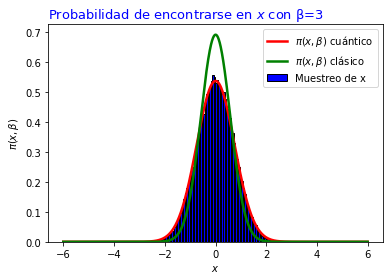

In [ ]:
#Librerías necesarias
import random, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct
from functools import lru_cache

#Guarda los resultados de ψ(n-2) y ψ(n-1) para calcular rápidamente ψ(n) de manera recursiva
@lru_cache(maxsize=None)

#Autofunciones de onda
def ψ(n,x):
  Hermite = hermite(n)
  return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
  return n + 0.5

#Recíproco de la temperatura
β = 3

#Condiciones iniciales para posiciones, niveles de energía
x = 0 #Posición inicial (posición de equilibrio)
x_new = 0 #Valor final del tránsito de posición
n = 0 #Nivel de energía inicial.
m = 0 #Nivel de energía final

#Tupla para recopilar valores de x en el muestreo
grid_x = []

#Generador de tránsitos de posición y niveles de energía
for k in range(100000):
  #Muestreo de x
  x_new = x + random.uniform(-1,1)
    #Probabilidad de aceptación de Metrópolis para x
  if random.uniform(0,1) < pow(ψ(n,x_new)/ψ(n,x) , 2):
      #Redefinición de posición del oscilador
      x = x_new
  #Muestreo de n
  m = n + random.choice([-1,1])
    #Exclución de niveles de energía negativos
  if m>=0:
      #Probabilidad de aceptación de Metrópolis para n
    if random.uniform(0,1) < np.exp(-β*(Energy(m)-Energy(n))) * pow(ψ(m,x)/ψ(n,x) , 2):
        #Redefinición del nivel de energía del oscilador
      n = m
  #Recopilar los valores de x obtenidos en el muestreo
  grid_x.append(x)

#Definición de fuentes y estilo de letra
font1 = {'family':'Latin Modern Roman','color':'blue','size':13}
font2 = {'family':'Latin Modern Roman','color':'darkred','size':15}

#Graficación del histograma
plt.ion()
n,bins,patches=plt.hist(grid_x, bins=100, density=True,facecolor='blue', edgecolor = 'black')
plt.xlabel('$x$')
plt.ylabel('$\pi(x,β)$')
plt.title(f"Probabilidad de encontrarse en $x$ con β={β}", fontdict = font1, loc = 'left')


#------------Curvas de densidad de probabilidad teóricas---------------#

#Densidad de probabilidad cuántica teórica
def QuantumDensity(x,β):
  return pow(np.tanh(0.5*β)/np.pi , 0.5) * np.exp(-pow(x,2) * np.tanh(0.5*β))

#Densidad de probabilidad clásica teórica
def ClassicDensity(x,β):
  return pow(0.5*β/np.pi , 0.5) * np.exp(- 0.5*β*pow(x,2))

#Rango de valores del eje de las abscisas
X = np.arange(-6 , 6 , 0.01)


#Rango de valores del eje de las ordenadas
QuantumDensity_Y = np.array([QuantumDensity(-10,β)])
ClassicDensity_Y = np.array([ClassicDensity(-10,β)])

#Graficación
for i in range(1,len(X)):
  QuantumDensity_Y = np.append(QuantumDensity_Y,QuantumDensity(X[i],β),axis=None)
  ClassicDensity_Y = np.append(ClassicDensity_Y,ClassicDensity(X[i],β),axis=None)

#Etiquetas y estilos
plt.plot(X , QuantumDensity_Y , linewidth=2.5 , color='red')
plt.plot(X , ClassicDensity_Y , linewidth=2.5 , color='green')
plt.legend(["$\pi(x,β)$ cuántico", "$\pi(x,β)$ clásico", "Muestreo de x"], loc ="upper right")



---


# **Finalmente, $\beta = 12$**



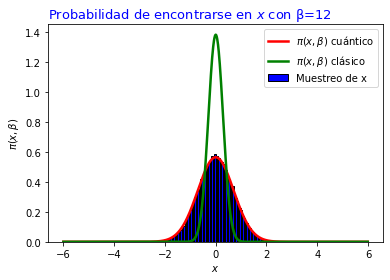

In [ ]:
#Librerías necesarias
import random, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct
from functools import lru_cache

#Guarda los resultados de ψ(n-2) y ψ(n-1) para calcular rápidamente ψ(n) de manera recursiva
@lru_cache(maxsize=None)

#Autofunciones de onda
def ψ(n,x):
  Hermite = hermite(n)
  return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
  return n + 0.5

#Recíproco de la temperatura
β = 12

#Condiciones iniciales para posiciones, niveles de energía
x = 0 #Posición inicial (posición de equilibrio)
x_new = 0 #Valor final del tránsito de posición
n = 0 #Nivel de energía inicial.
m = 0 #Nivel de energía final

#Tupla para recopilar valores de x en el muestreo
grid_x = []

#Generador de tránsitos de posición y niveles de energía
for k in range(100000):
  #Muestreo de x
  x_new = x + random.uniform(-1,1)
    #Probabilidad de aceptación de Metrópolis para x
  if random.uniform(0,1) < pow(ψ(n,x_new)/ψ(n,x) , 2):
      #Redefinición de posición del oscilador
      x = x_new
  #Muestreo de n
  m = n + random.choice([-1,1])
    #Exclución de niveles de energía negativos
  if m>=0:
      #Probabilidad de aceptación de Metrópolis para n
    if random.uniform(0,1) < np.exp(-β*(Energy(m)-Energy(n))) * pow(ψ(m,x)/ψ(n,x) , 2):
        #Redefinición del nivel de energía del oscilador
      n = m
  #Recopilar los valores de x obtenidos en el muestreo
  grid_x.append(x)

#Definición de fuentes y estilo de letra
font1 = {'family':'Latin Modern Roman','color':'blue','size':13}
font2 = {'family':'Latin Modern Roman','color':'darkred','size':15}

#Graficación del histograma
plt.ion()
n,bins,patches=plt.hist(grid_x, bins=100, density=True,facecolor='blue', edgecolor = 'black')
plt.xlabel('$x$')
plt.ylabel('$\pi(x,β)$')
plt.title(f"Probabilidad de encontrarse en $x$ con β={β}", fontdict = font1, loc = 'left')


#------------Curvas de densidad de probabilidad teóricas---------------#

#Densidad de probabilidad cuántica teórica
def QuantumDensity(x,β):
  return pow(np.tanh(0.5*β)/np.pi , 0.5) * np.exp(-pow(x,2) * np.tanh(0.5*β))

#Densidad de probabilidad clásica teórica
def ClassicDensity(x,β):
  return pow(0.5*β/np.pi , 0.5) * np.exp(- 0.5*β*pow(x,2))

#Rango de valores del eje de las abscisas
X = np.arange(-6 , 6 , 0.01)


#Rango de valores del eje de las ordenadas
QuantumDensity_Y = np.array([QuantumDensity(-10,β)])
ClassicDensity_Y = np.array([ClassicDensity(-10,β)])

#Graficación
for i in range(1,len(X)):
  QuantumDensity_Y = np.append(QuantumDensity_Y,QuantumDensity(X[i],β),axis=None)
  ClassicDensity_Y = np.append(ClassicDensity_Y,ClassicDensity(X[i],β),axis=None)

#Etiquetas y estilos
plt.plot(X , QuantumDensity_Y , linewidth=2.5 , color='red')
plt.plot(X , ClassicDensity_Y , linewidth=2.5 , color='green')
plt.legend(["$\pi(x,β)$ cuántico", "$\pi(x,β)$ clásico", "Muestreo de x"], loc ="upper right")



---


# **Muestreo de autovalores de energía en con tránsitos entre autoestados $n\rightarrow m$, manteniendo $x$ fijo y con los valores de $\beta$ anteriormente estudiados.**





---


# **Para $\beta = 0.2$**



Text(0.0, 1.0, 'Probabilidad de estar en nivel $n$ con $β=0.2$')

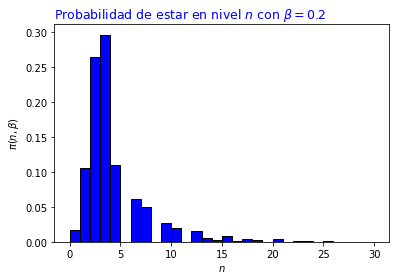

In [ ]:
#Librerías necesarias
import random, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct
from functools import lru_cache

#Guarda los resultados de ψ(n-2) y ψ(n-1) para calcular rápidamente ψ(n) de manera recursiva
@lru_cache(maxsize=None)

#Autofunciones de onda
def ψ(n,x):
    Hermite = hermite(n)
    return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
    return n + 0.5

#Recíproco de temperatura
β = 0.2

#Condiciones iniciales de los niveles de energía
n = 0 #Nivel de energía inicial.
m = 0 #Nivel de energía final.
Δx = 2 #Tránsito en posiciones.

#Tupla de valores de niveles de energía en tránsito
N = []

#Saltos aleatorios entre niveles de energía:
for i in range(1000000):
    m = n + random.choice([-1,1])
    #Exclución de niveles de energía negativos
    if m >= 0:
        #Probabilidad de aceptación de Metrópolis
        if random.uniform(0,1) < math.exp(-β*(Energy(m)-Energy(n))) * pow((ψ(m,Δx) / ψ(n,Δx)) , 2):
          #Redefinir el nivel de energía
          n = m
    #Recopilar los valores de los niveles de energía
    N.append(n)

#Definición de fuente y estilos de letra
font1 = {'family':'Latin Modern Roman','color':'blue','size':12.5}

#Graficación y definición de aspectos visuales
plt.ion()
n,bins,patches = plt.hist(N, bins = max(N), density=True, edgecolor = 'black', facecolor='blue')
plt.xlabel('$n$')
plt.ylabel('$\pi(n,β)$')
plt.title(f"Probabilidad de estar en nivel $n$ con $β={β}$", fontdict = font1, loc = 'left')



---


# **Para $\beta = 3$**



Text(0.0, 1.0, 'Probabilidad de estar en nivel $n$ con $β=3$')

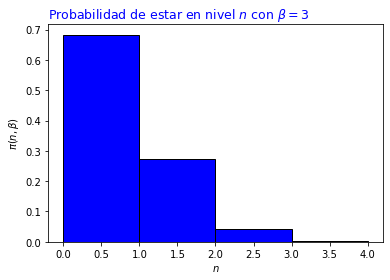

In [ ]:
#Librerías necesarias
import random, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct
from functools import lru_cache

#Guarda los resultados de ψ(n-2) y ψ(n-1) para calcular rápidamente ψ(n) de manera recursiva
@lru_cache(maxsize=None)

#Autofunciones de onda
def ψ(n,x):
    Hermite = hermite(n)
    return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
    return n + 0.5

#Recíproco de temperatura
β = 3

#Condiciones iniciales de los niveles de energía
n = 0 #Nivel de energía inicial.
m = 0 #Nivel de energía final.
Δx = 2 #Tránsito en posiciones.

#Tupla de valores de niveles de energía en tránsito
N = []

#Saltos aleatorios entre niveles de energía:
for i in range(1000000):
    m = n + random.choice([-1,1])
    #Exclución de niveles de energía negativos
    if m >= 0:
        #Probabilidad de aceptación de Metrópolis
        if random.uniform(0,1) < math.exp(-β*(Energy(m)-Energy(n))) * pow((ψ(m,Δx) / ψ(n,Δx)) , 2):
          #Redefinir el nivel de energía
          n = m
    #Recopilar los valores de los niveles de energía
    N.append(n)

#Definición de fuente y estilos de letra
font1 = {'family':'Latin Modern Roman','color':'blue','size':12.5}

#Graficación y definición de aspectos visuales
plt.ion()
n,bins,patches = plt.hist(N, bins = max(N), density=True, edgecolor = 'black', facecolor='blue')
plt.xlabel('$n$')
plt.ylabel('$\pi(n,β)$')
plt.title(f"Probabilidad de estar en nivel $n$ con $β={β}$", fontdict = font1, loc = 'left')



---


# **Y para $\beta = 12$**



Text(0.0, 1.0, 'Probabilidad de estar en nivel $n$ con $β=12$')

findfont: Font family ['Latin Modern Roman'] not found. Falling back to DejaVu Sans.


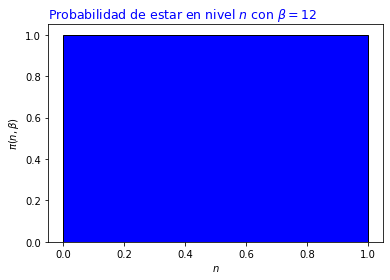

In [ ]:
#Librerías necesarias
import random, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import hermite
from math import factorial as fct
from functools import lru_cache

#Guarda los resultados de ψ(n-2) y ψ(n-1) para calcular rápidamente ψ(n) de manera recursiva
@lru_cache(maxsize=None)

#Autofunciones de onda
def ψ(n,x):
    Hermite = hermite(n)
    return pow( pow(np.pi,0.5) * pow(2,n) * fct(n) , -0.5) * Hermite(x) * np.exp(-0.5*pow(x , 2))

#Autovalores de energía
def Energy(n):
    return n + 0.5

#Recíproco de temperatura
β = 12

#Condiciones iniciales de los niveles de energía
n = 0 #Nivel de energía inicial.
m = 0 #Nivel de energía final.
Δx = 2 #Tránsito en posiciones.

#Tupla de valores de niveles de energía en tránsito
N = []

#Saltos aleatorios entre niveles de energía:
for i in range(1000000):
    m = n + random.choice([-1,1])
    #Exclución de niveles de energía negativos
    if m >= 0:
        #Probabilidad de aceptación de Metrópolis
        if random.uniform(0,1) < math.exp(-β*(Energy(m)-Energy(n))) * pow((ψ(m,Δx) / ψ(n,Δx)) , 2):
          #Redefinir el nivel de energía
          n = m
    #Recopilar los valores de los niveles de energía
    N.append(n)

#Definición de fuente y estilos de letra
font1 = {'family':'Latin Modern Roman','color':'blue','size':12.5}

#Graficación y definición de aspectos visuales
plt.ion()
n,bins,patches = plt.hist(N, bins = max(N), density=True, edgecolor = 'black', facecolor='blue')
plt.xlabel('$n$')
plt.ylabel('$\pi(n,β)$')
plt.title(f"Probabilidad de estar en nivel $n$ con $β={β}$", fontdict = font1, loc = 'left')